# **Projeto de Transfer Learning em Python**

In [ ]:
# Importando os pacotes necessários

%matplotlib inline

import os
import random
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from six.moves import urllib
import gzip

from shutil import copyfile

# import the needed packages
# import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

### **Carregando os dados**

In [ ]:
# Baixando o conjunto de dados de cães e gatos

!echo "Downloading catsanddogs for image notebooks"
!curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip #download

# As instruções para preparar o conjunto de dados são para Linux ou macOS

!unzip kagglecatsanddogs_5340.zip
!rm kagglecatsanddogs_5340.zip
!ls

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/55

### **Exploração e limpeza dos dados**

In [ ]:
print(len(os.listdir('/content/PetImages/Cat')))
print(len(os.listdir('/content/PetImages/Dog')))


12501
12501


In [ ]:
try:
    os.mkdir('cats-v-dogs')
    os.mkdir('cats-v-dogs/training')
    os.mkdir('cats-v-dogs/testing')
    os.mkdir('cats-v-dogs/training/cats')
    os.mkdir('cats-v-dogs/training/dogs')
    os.mkdir('cats-v-dogs/testing/cats')
    os.mkdir('cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [ ]:
datasetdir = '/content/PetImages'
os.chdir(datasetdir)


ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

### **Transformando e exibindo os dados**

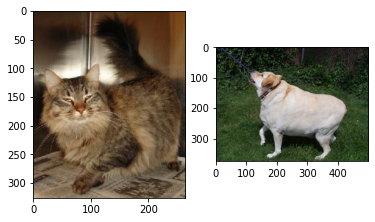

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img.imread('Cat/665.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('Dog/11703.jpg'))

In [ ]:
images = []
for i in range(10):
  im = img.imread('Cat/660.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255


In [ ]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
gen = ImageDataGenerator()


In [ ]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Dog','Cat')
)

Found 25000 images belonging to 2 classes.


In [ ]:
batch = next(iterator)
len(batch)

2

In [ ]:
print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


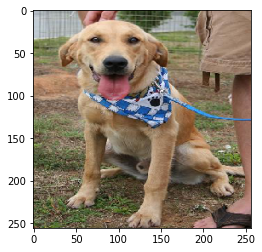

In [ ]:
plt.imshow(batch[0][0].astype(int))

In [ ]:
batch[1][0]

array([1., 0.], dtype=float32)

In [ ]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(int))
      assert(label[0]+label[1]==1.)
      categ = 'Dog' if label[0]>0.5 else 'Cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

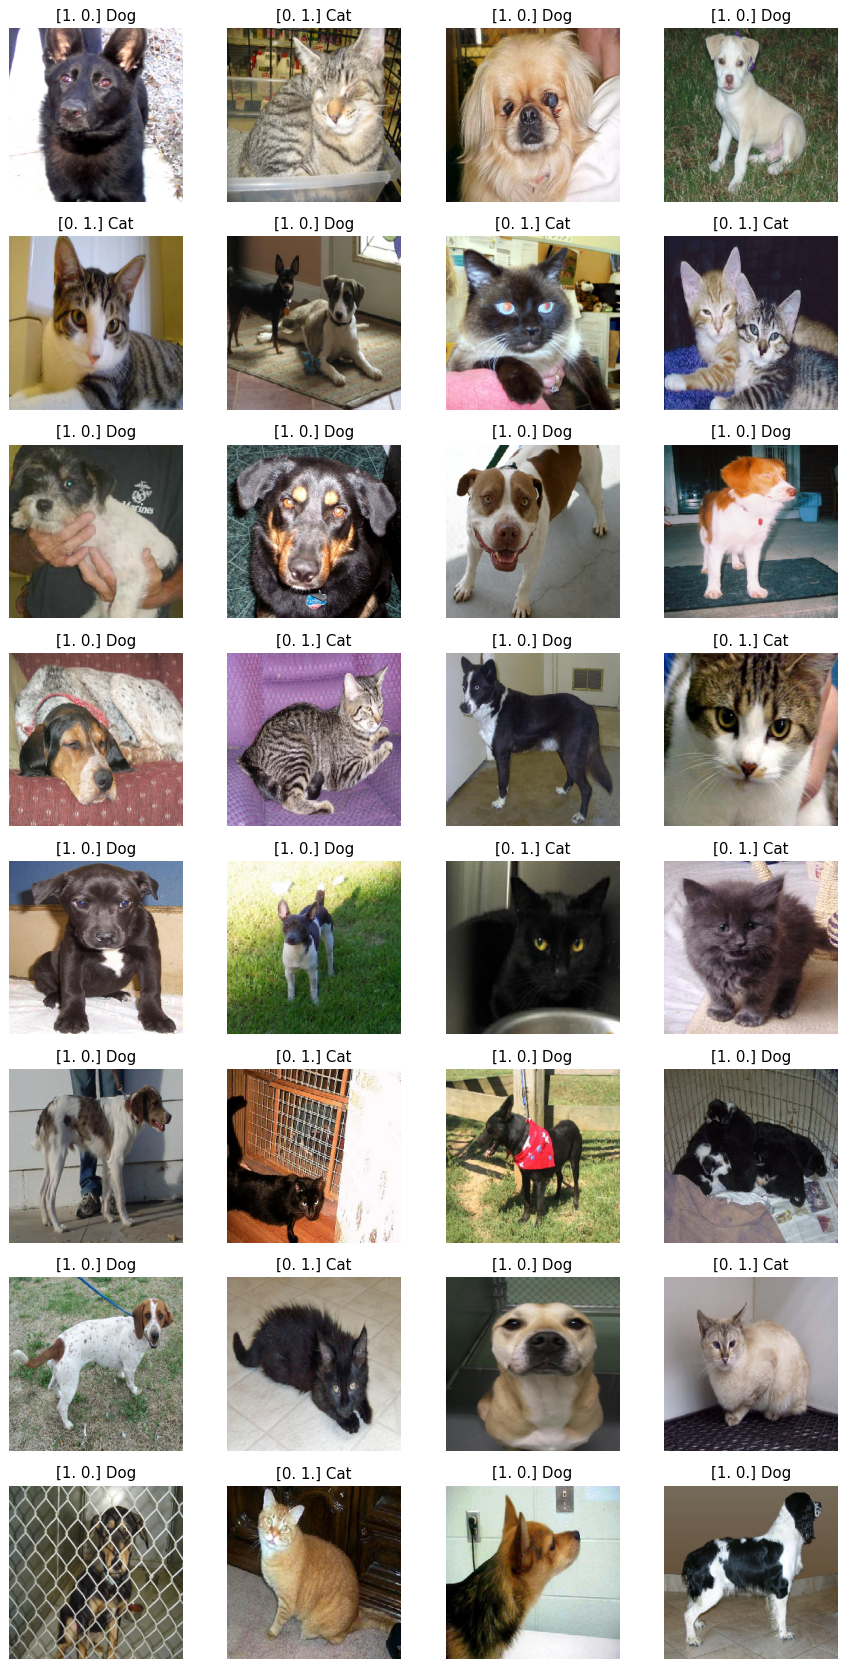

In [ ]:
plot_images(next(iterator))

### **Treinando o conjuto de dados**

In [ ]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [ ]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 18000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [24]:
history = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    epochs=10,
)

Epoch 1/10
   7/2250 [..............................] - ETA: 1:41 - loss: 0.2016 - acc: 0.9107

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 78s 35ms/step - loss: 0.2661 - acc: 0.8918 - val_loss: 0.3430 - val_acc: 0.8600
Epoch 2/10
2250/2250 [==============================] - 77s 34ms/step - loss: 0.2467 - acc: 0.8989 - val_loss: 0.3076 - val_acc: 0.8680
Epoch 3/10
2250/2250 [==============================] - 76s 34ms/step - loss: 0.2335 - acc: 0.9071 - val_loss: 0.3136 - val_acc: 0.8700
Epoch 4/10
2250/2250 [==============================] - 77s 34ms/step - loss: 0.2242 - acc: 0.9084 - val_loss: 0.3464 - val_acc: 0.8520
Epoch 5/10
2250/2250 [==============================] - 77s 34ms/step - loss: 0.2131 - acc: 0.9144 - val_loss: 0.3303 - val_acc: 0.8660
Epoch 6/10
2250/2250 [==============================] - 77s 34ms/step - loss: 0.2082 - acc: 0.9168 - val_loss: 0.3209 - val_acc: 0.8700
Epoch 7/10
2250/2250 [==============================] - 76s 34ms/step - loss: 0.1922 - acc: 0.9241 - val_loss: 0.3241 - val_acc: 0.8680
Epoch 8/10
2250/2250 [==============================] - 77s

### **Exibindo o resultados do treinento**

In [25]:
def plot_history(history, yrange):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

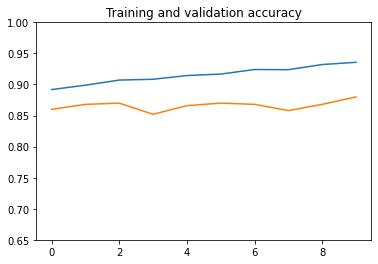

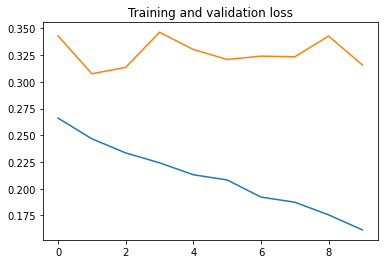

In [26]:
plot_history(history, (0.65, 1.))

### **Aumento de dados**

In [27]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    validation_split = 0.2,
)

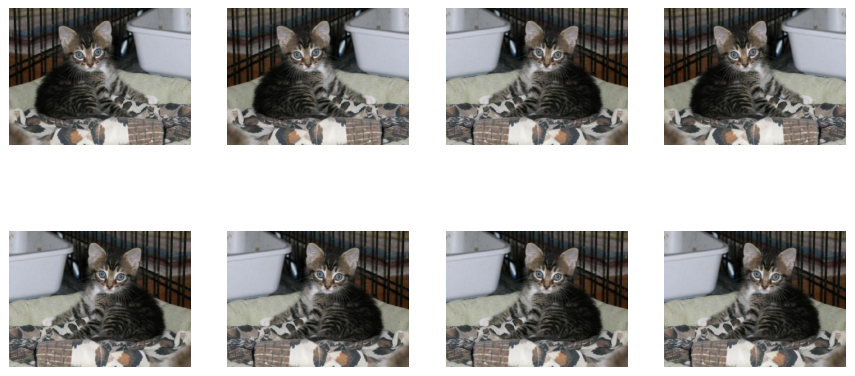

In [28]:
image = img.imread('Cat/12.jpg')

def plot_transform():
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

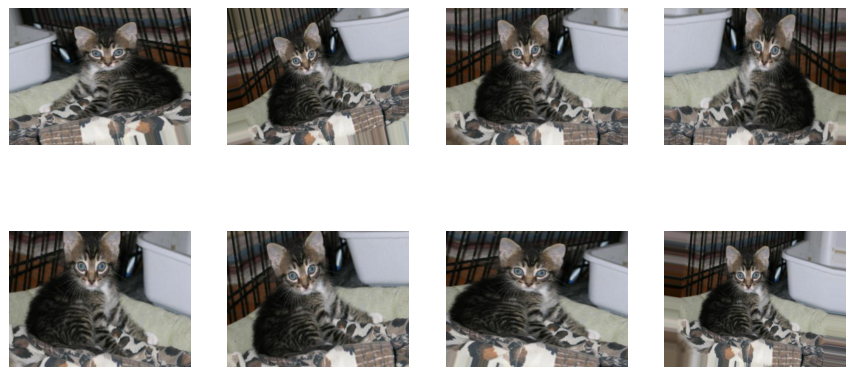

In [29]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()

In [35]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 20250 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [36]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 24)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten_2 (Flatten)         (None, 311904)           

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [38]:
history_augm = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    epochs=40,
)

Epoch 1/40
 410/2532 [===>..........................] - ETA: 4:16 - loss: 0.6992 - acc: 0.5312

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2532/2532 [==============================] - 307s 121ms/step - loss: 0.6159 - acc: 0.6529 - val_loss: 0.5501 - val_acc: 0.7320
Epoch 2/40
2532/2532 [==============================] - 305s 120ms/step - loss: 0.5130 - acc: 0.7497 - val_loss: 0.4491 - val_acc: 0.7720
Epoch 3/40
2532/2532 [==============================] - 299s 118ms/step - loss: 0.4544 - acc: 0.7880 - val_loss: 0.4494 - val_acc: 0.7880
Epoch 4/40
2532/2532 [==============================] - 295s 116ms/step - loss: 0.4149 - acc: 0.8138 - val_loss: 0.4047 - val_acc: 0.8000
Epoch 5/40
2532/2532 [==============================] - 294s 116ms/step - loss: 0.3899 - acc: 0.8272 - val_loss: 0.4131 - val_acc: 0.8120
Epoch 6/40
2532/2532 [==============================] - 295s 116ms/step - loss: 0.3614 - acc: 0.8402 - val_loss: 0.4038 - val_acc: 0.8160
Epoch 7/40
2532/2532 [==============================] - 294s 116ms/step - loss: 0.3383 - acc: 0.8531 - val_loss: 0.3315 - val_acc: 0.8600
Epoch 8/40
2532/2532 [=======================

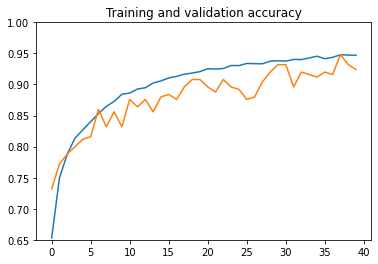

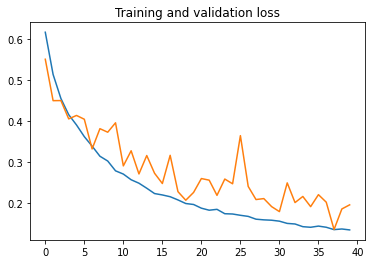

In [39]:
plot_history(history_augm, (0.65, 1))

### **Usando um modelo pré-treinado: ResNet50**

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 4s 0us/step


Em seguida, definimos uma pequena função de utilidade para avaliar o modelo em uma imagem de entrada e chamamos essa função em algumas imagens em nosso conjunto de dados

In [41]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    # print the probability and category name for the 5 categories 
    # with highest probability: 
    print('Predicted:', decode_predictions(preds, top=5)[0])
    plt.imshow(img)

Predicted: [('n02102040', 'English_springer', 0.25571927), ('n02100236', 'German_short-haired_pointer', 0.16240002), ('n02093428', 'American_Staffordshire_terrier', 0.098809384), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.08030297), ('n02099712', 'Labrador_retriever', 0.07754765)]


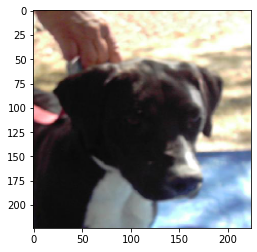

In [45]:
evaluate('/content/PetImages/Dog/10007.jpg')

Predicted: [('n02099712', 'Labrador_retriever', 0.28370374), ('n02109047', 'Great_Dane', 0.19969639), ('n02099267', 'flat-coated_retriever', 0.11479504), ('n02107142', 'Doberman', 0.05612186), ('n02089078', 'black-and-tan_coonhound', 0.043165218)]


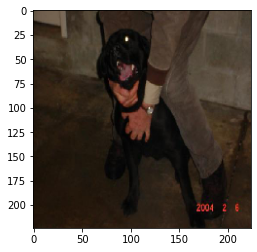

In [46]:
evaluate('/content/PetImages/Dog/10188.jpg')

Predicted: [('n02096437', 'Dandie_Dinmont', 0.7582223), ('n02098413', 'Lhasa', 0.13737771), ('n02097474', 'Tibetan_terrier', 0.03101932), ('n02093754', 'Border_terrier', 0.018662168), ('n02113712', 'miniature_poodle', 0.015777905)]


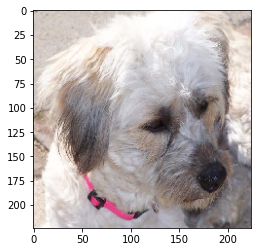

In [47]:
evaluate('/content/PetImages/Dog/1014.jpg')

Predicted: [('n02094258', 'Norwich_terrier', 0.34793243), ('n02085620', 'Chihuahua', 0.11957316), ('n02123045', 'tabby', 0.08625675), ('n02113186', 'Cardigan', 0.07970776), ('n02094114', 'Norfolk_terrier', 0.027367007)]


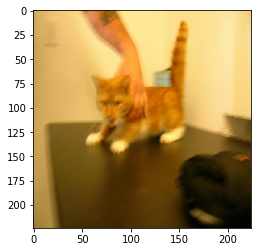

In [48]:
evaluate('/content/PetImages/Cat/0.jpg')


Predicted: [('n02123045', 'tabby', 0.7306045), ('n02123159', 'tiger_cat', 0.15751234), ('n02124075', 'Egyptian_cat', 0.07735979), ('n03958227', 'plastic_bag', 0.0035997469), ('n02127052', 'lynx', 0.0033316924)]


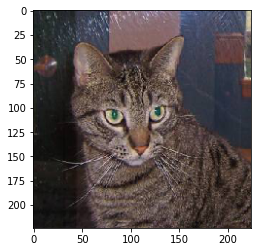

In [49]:
evaluate('/content/PetImages/Cat/1.jpg')
